# Stage discharge, Width discharge and Backwater curve
## I Stage Discharge
## II Width Discharge
## III Backwater curve
## IIII Velocities

Sten Schurer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from tabulate import tabulate

## -------------------------------------------------------------------------------------------------------------------------------
### I   Stage discharge

In [2]:
def stage(a, h, h0, b):
    Q = a*(h-h0)**b
    return(Q)

#### Boundary condition downstream
The waterlevels in the file are determined by itterating untill there is no visible backwater curve present.  

[2.63526111 1.42988999]
0.9955801384013551
26.90853089629385
2.635261113909016


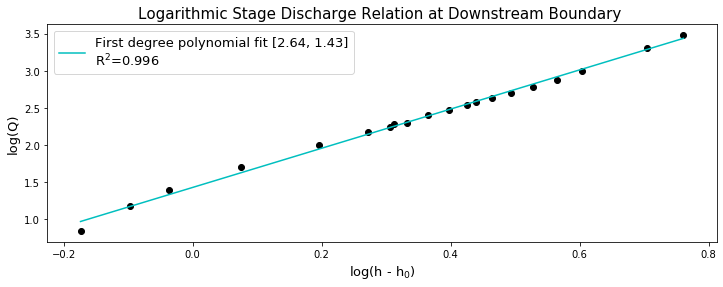

In [14]:
plt.figure(figsize=(12, 4))
BC = pd.read_csv('C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/B.C.downstream.csv')
BCD = BC.drop([0])
# plt.scatter(BCD['Q'], BCD['BC'])

logQ = np.log10(BCD['Q'])
h_h0 = (BCD['BC'] - 348.93)
logH = np.log10(h_h0)
plt.scatter(logH, logQ, color='k')

polynomial = np.polyfit(logH, logQ, 1)
print(polynomial)

results = {}
# r-squared
p = np.poly1d(polynomial)
# fit values, and mean
yhat = p(logH)                         
ybar = np.sum(logQ)/len(logQ)          
ssreg = np.sum((yhat-ybar)**2)   
sstot = np.sum((logQ - ybar)**2)    
results['determination'] = ssreg / sstot
print(results['determination'])

#plot the polynomial and the track
x = np.linspace(0, 350, 20)
polyy = np.poly1d(polynomial)
poly_track = pd.DataFrame(polyy(logH))
plt.plot(logH, poly_track, 'c')
plt.title('Logarithmic Stage Discharge Relation at Downstream Boundary ', fontsize=15)
plt.xlabel('log(h - h$_0$)', fontsize=13)
plt.ylabel('log(Q)', fontsize=13)
plt.legend(['First degree polynomial fit [2.64, 1.43]' +  "\n" + 'R$^2$=0.996'], fontsize= 13)
a = (10**polynomial[1])
b = polynomial[0]
print(a)
print(b)

plt.savefig(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Figures/BC_loglog.png')

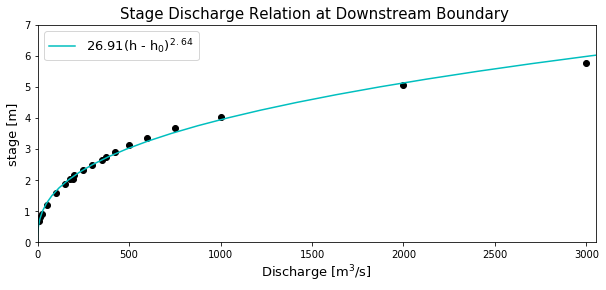

In [4]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.gca()
ax1.set(ylim=(0, 7))
ax1.set(xlim=(0, 3050))

h  = np.linspace(0, 8, 33)
h0 = 0
plt.plot(stage(a,h,h0,b), h, 'c')
plt.scatter(BCD['Q'], (BCD['BC'] - 348.93), color='k')
plt.title('Stage Discharge Relation at Downstream Boundary ', fontsize=15)
plt.xlabel('Discharge [m$^3$/s]', fontsize=13)
plt.ylabel('stage [m]', fontsize=13)
plt.legend(['26.91(h - h$_0$)$^2$$^.$$^6$$^4$'], fontsize= 13)

# plt.savefig(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Figures/BC_StageD.png')

### Get all water levels for the downstream boundary condition corresponding to certain discharges

In [5]:
Q_data = np.loadtxt('C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Discharge.txt')

for i in range(len(Q_data)):
    h = (Q_data[i]/a)**(1/b)
#     print(h+348.93)

### Stage Discharge

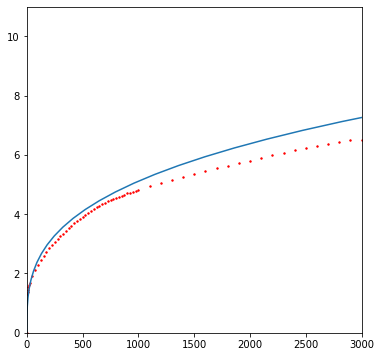

In [6]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.gca()
ax1.set(ylim=(0, 11))
ax1.set(xlim=(0, 3000))

SQ = pd.read_csv('C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Model_runs.csv')
# print(SQ)
plt.scatter(SQ['Q'], (SQ['WL2']-349.25), s=2, color='r');

# Warma parameters:
a = 6.05
b = 3.13
h  = np.linspace(0, 9.5, 33)
h0 = 0
plt.plot(stage(a,h,h0,b), h);

### Get stage discharge parameters
By plotting log h against log Q

       Q          BC     WL1     WL2     WL3     WL4     WL5  Width2  Width3  \
1      5  349.458006  350.56  350.56  350.56  350.55  350.55      22      29   
2      7  349.600000  350.63  350.63  350.63  350.62  350.61      22      30   
3     10  349.616863  350.70  350.70  350.70  350.69  350.68      23      30   
4     15  349.731108  350.78  350.78  350.78  350.77  350.76      24      30   
5     20  349.823514  350.86  350.86  350.85  350.84  350.83      24      31   
..   ...         ...     ...     ...     ...     ...     ...     ...     ...   
61  2600  354.596014  355.59  355.54  355.62  355.65  355.52      98     110   
62  2700  354.677743  355.66  355.61  355.69  355.73  355.59      98     110   
63  2800  354.757614  355.73  355.68  355.77  355.81  355.67      98     110   
64  2900  354.835734  355.80  355.75  355.84  355.88  355.74      98     112   
65  3000  354.700000  355.80  355.75  355.85  355.89  355.74      98     112   

    Width2_m  Width3_m  
1      76.12  

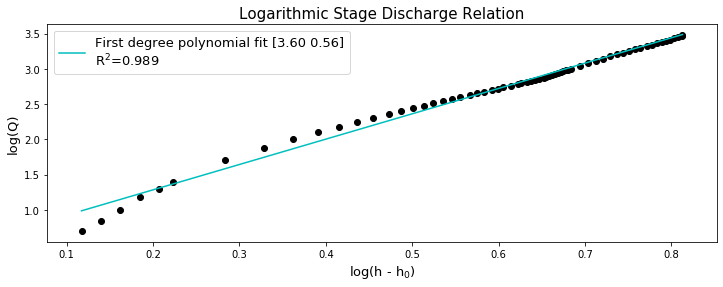

In [7]:
plt.figure(figsize=(12, 4))
st = SQ.drop([0])
print(st)
logQ = np.log10(st['Q'])
h_h0 = (st['WL2'] - 349.25)
logH = np.log10(h_h0)
plt.scatter(logH, logQ, color='k')

polynomial = np.polyfit(logH, logQ, 1)
print(polynomial)


results = {}
# Polynomial Coefficients
results['polynomial'] = polynomial.tolist()

# r-squared
p = np.poly1d(polynomial)
# fit values, and mean
yhat = p(logH)                         
ybar = np.sum(logQ)/len(logQ)          
ssreg = np.sum((yhat-ybar)**2)   
sstot = np.sum((logQ - ybar)**2)    
results['determination'] = ssreg / sstot
print(results['determination'])


#plot the polynomial and the track
x = np.linspace(0, 350, 20)
polyy = np.poly1d(polynomial)
poly_track = pd.DataFrame(polyy(logH))
plt.plot(logH, poly_track, 'c')
plt.xlabel('log(h - h0)', fontsize=15)
plt.ylabel('log(Q)', fontsize=15)
a = (10**polynomial[1])
b = polynomial[0]
print(a)
print(b)

plt.title('Logarithmic Stage Discharge Relation', fontsize=15)
plt.xlabel('log(h - h$_0$)', fontsize=13)
plt.ylabel('log(Q)', fontsize=13)
plt.legend(['First degree polynomial fit [3.60 0.56]' +  "\n" + 'R$^2$=0.989'], fontsize= 13)
a = (10**polynomial[1])
b = polynomial[0]
print(a)
print(b)

# plt.savefig(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Figures/log_log.png')

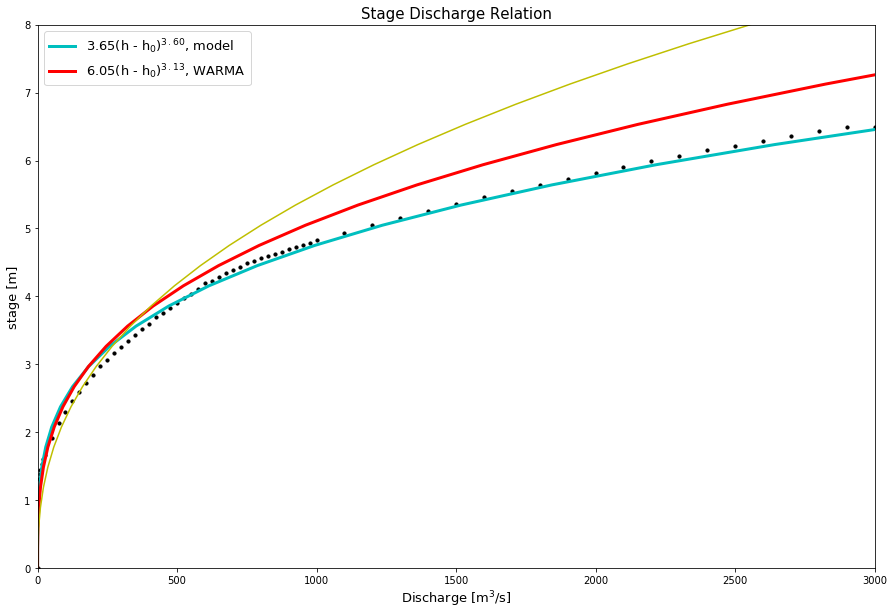

In [8]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.gca()
ax1.set(ylim=(0, 8))
ax1.set(xlim=(0, 3000))

# parameters
a = 3.654990870809689
b = 3.5971710949600477
h  = np.linspace(0, 9.5, 33)
h0 = 0
plt.plot(stage(a,h,h0,b), h, color='c', linewidth=3)

# Warma parameters
a = 6.05
b = 3.13
h  = np.linspace(0, 9.5, 33)
h0 = 0
plt.plot(stage(a,h,h0,b), h, color='r', linewidth=3);

# # Ivar parameters
a = 13.54
b = 2.52
h  = np.linspace(0, 9.5, 33)
h0 = 0
plt.plot(stage(a,h,h0,b), h, color='y');

SQ = pd.read_csv('C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Model_runs.csv')
# print(SQ)
plt.scatter(SQ['Q'], (SQ['WL2']-349.25), s=10, color='k');

plt.title('Stage Discharge Relation', fontsize=15)
plt.xlabel('Discharge [m$^3$/s]', fontsize=13)
plt.ylabel('stage [m]', fontsize=13)
plt.legend(['3.65(h - h$_0$)$^3$$^.$$^6$$^0$, model'] +['6.05(h - h$_0$)$^3$$^.$$^1$$^3$, WARMA'], fontsize= 13)

# plt.savefig(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Figures/Stage_Discharge_small.png')

## -------------------------------------------------------------------------------------------------------------------------------
### II   Width Discharge

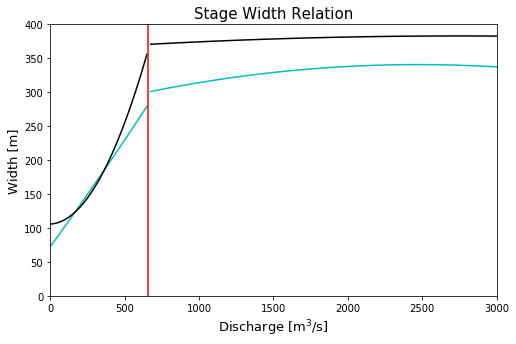

In [9]:
fig = plt.figure(figsize=(8, 5))
ax1 = plt.gca()
ax1.set(ylim=(0, 400))
ax1.set(xlim=(0, 3000))

W = pd.read_csv('C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Model_runs.csv')
Width = W.drop([0])
Q1 = Width['Q'].iloc[:31]
Q2 = Width['Q'].iloc[31:]
W2_1 = Width['Width2_m'].iloc[:31]
W2_2 = Width['Width2_m'].iloc[31:]
W3_1 = Width['Width3_m'].iloc[:31]
W3_2 = Width['Width3_m'].iloc[31:]

# plt.scatter(Q1, W2_1, color='y', s=5)
# plt.scatter(Q1, W3_1, color='r', s=5)
# plt.scatter(Q2, W2_2, color='y', s=5)
# plt.scatter(Q2, W3_2, color='r', s=5)

polynomial1 = np.polyfit(Q1, W2_1, 2)
polynomial2 = np.polyfit(Q1, W3_1, 2)
polynomial3 = np.polyfit(Q2, W2_2, 2)
polynomial4 = np.polyfit(Q2, W3_2, 2)

poly1 = np.poly1d(polynomial1)
poly2 = np.poly1d(polynomial2)
poly3 = np.poly1d(polynomial3)
poly4 = np.poly1d(polynomial4)

poly_track1 = pd.DataFrame(poly1(Q1))
poly_track2 = pd.DataFrame(poly2(Q1))
poly_track3 = pd.DataFrame(poly3(Q2))
poly_track4 = pd.DataFrame(poly4(Q2))

plt.plot(Q1, poly_track1, 'c')
plt.plot(Q1, poly_track2, 'k')
plt.plot(Q2, poly_track3, 'c')
plt.plot(Q2, poly_track4, 'k')

plt.xlabel('log(h - h0)', fontsize=15)
plt.ylabel('log(Q)', fontsize=15)

# boundary
xd = [660]*20
yw = np.linspace(0, 400, 20)
plt.plot(xd, yw, 'r')

plt.title('Stage Width Relation', fontsize=15)
plt.xlabel('Discharge [m$^3$/s]', fontsize=13)
plt.ylabel('Width [m]', fontsize=13);

## -------------------------------------------------------------------------------------------------------------------------------
### III   Backwater curve

[[2.22353998e-05]
 [1.82970291e+00]]


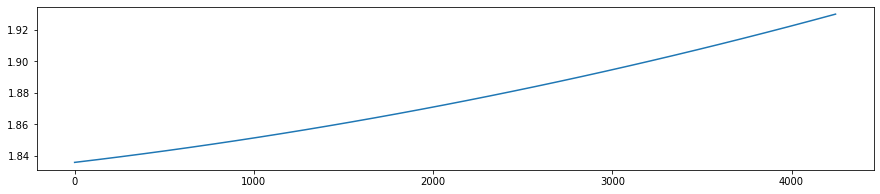

In [10]:
plt.figure(figsize=(15, 3))
BW = pd.read_csv('C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Backwater_curve1000.csv')
# print(BW)
slope = 0.000229809
slope  = np.linspace(350.12, 349.144, 34)
x = np.linspace(0, 4245.5, 34)

# plt.plot(BW['WL'])
# plt.plot(slope)
# # plt.plot(BW['WL']-slope)
# plt.plot(BW['mid']-slope)
# plt.plot(BW['cal'])

dif = pd.DataFrame(BW['cal'])
diff = dif['cal'].iloc[0:34]
dig  = pd.DataFrame(diff - slope)
# plt.scatter(x, dig);

polynomial = np.polyfit(x, dig, 1)
print(polynomial)


polynomial = [2.22353998e-05, 1.82970291e+00]
polynomial = [2.05824127e-09, 1.34971365e-05, 1.83569859e+00]

#plot the polynomial and the track
polyy = np.poly1d(polynomial)
poly_track = pd.DataFrame(polyy(x))
plt.plot(x, poly_track, '-');

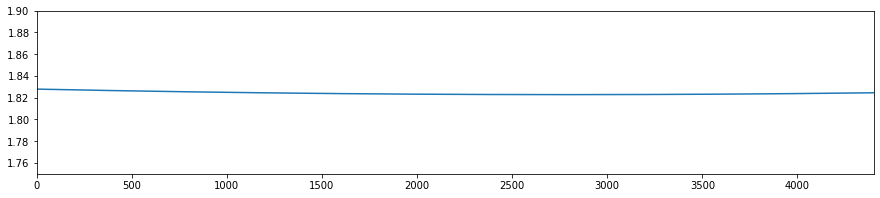

In [11]:
plt.figure(figsize=(15, 3))
ax1 = plt.gca()
ax1.set(ylim=(1.75, 1.90))
ax1.set(xlim=(0, 4400))
x = np.linspace(0, 4400, 200)

# polynomial_7    = [1.30237675e-09, -1.17910439e-05, 4.60852414e-01]
# polynomial_15   = [-4.05868720e-09, 1.06586128e-05, 5.94561939e-01]
# polynomial_25   = [-1.90410688e-09, 3.58887597e-06, 7.23309954e-01]
# polynomial_50   = [-2.06251460e-10, -4.41974086e-06, 9.69732060e-01]
# polynomial_100  = [3.59888593e-09, -1.44858701e-05, 1.34082127e+00]
# polynomial_150  = [3.33294186e-09, -1.05390078e-05, 1.62863921e+00]
# polynomial_175  = [4.65618884e-09, -4.96095794e-06, 1.76138509e+00]

polynomial_191  = [6.51498447e-10, -3.63409276e-06, 1.82790026e+00]
# polynomial_250  = [9.19869342e-10, -1.39150559e-07, 2.08201663e+00]
# polynomial_300  = [5.78644354e-10, 1.01713147e-06, 2.26310939e+00]

# polynomial_375  = [-6.46469687e-10, -2.96886810e-06, 2.56468484e+00]
# polynomial_425  = [-8.06256018e-10, 3.15430981e-06, 2.71072959e+00]
# polynomial_500  = [-3.63402842e-10, 1.66245051e-06, 2.91555829e+00]
# polynomial_600  = [-2.64645344e-10, 1.24958658e-06, 3.16614562e+00]
# polynomial_750  = [1.75768024e-09, 1.42342066e-06, 3.45258966e+00]    #-2
# polynomial_1000 = [ 1.92151204e-09, -6.81441421e-06, 3.81662134e+00]
# polynomial_3000 = [2.71200131e-10, -5.78301896e-06, 5.59330050e+00]

# plt.figure(figsize=(15, 3))
# polyy = np.poly1d(polynomial_15)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_25)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_50)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_100)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_150)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_175)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

polyy = np.poly1d(polynomial_191)
poly_track = pd.DataFrame(polyy(x))
plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_250)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_300)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_375)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_425)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_500)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_600)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_750)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_1000)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

# polyy = np.poly1d(polynomial_3000)
# poly_track = pd.DataFrame(polyy(x))
# plt.plot(x, poly_track, '-');

## -------------------------------------------------------------------------------------------------------------------------------
### IIII Velocities

In [12]:
V = pd.read_csv('C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Velocity_output/Velocity_191.csv')
print(V)

          1         2         3         4         5         6         7  \
0  0.841067  0.849496  0.814093  0.848672  0.761713  0.761713  0.839129   
1  0.953228  0.966540  0.928373  0.965148  0.871511  0.871511  0.951877   
2  1.017190  1.032430  0.992261  1.028290  0.933271  0.933271  1.015640   
3  1.064880  1.079950  1.037740  1.072570  0.977280  0.977280  1.062510   
4  1.104020  1.117710  1.073470  1.107280  1.011860  1.011860  1.100610   
5  1.137240  1.148900  1.102810  1.135880  1.040280  1.040280  1.132770   
6  1.165500  1.174910  1.127240  1.159830  1.064010  1.064010  1.160090   
7  1.189100  1.196300  1.147440  1.179780  1.083740  1.083740  1.182930   
8  1.208140  1.213370  1.163710  1.196000  1.099760  1.099760  1.201430   
9  1.223460  1.227000  1.176820  1.209250  1.112760  1.112760  1.216370   

          8         9        10     F   3000_2   3000_5  
0  0.480155  0.860523  0.702876  1.22  2.27508  2.28450  
1  0.564032  0.983349  0.801113  1.22  2.52065  2.53816  


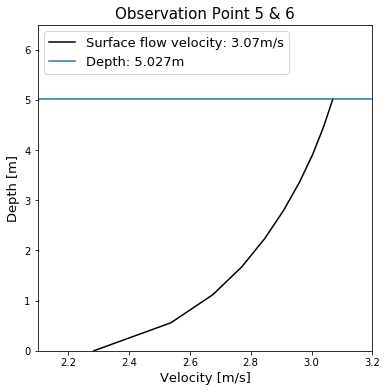

In [13]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.gca()
ax1.set(ylim=(0, 6.5))
ax1.set(xlim=(2.1, 3.2))

v1 =  1.90
v2 =  1.78
v3 =  1.68
v4 =  1.72
v5 =  1.59
v6 =  1.59
v7 =  1.94
v8 =  0.65
v9 =  1.69
v10 = 1.69
v3000_2 = 5.179
v3000_5 = 5.027

plt.plot(V['3000_5'], np.linspace(0, v3000_5, 10) , 'k')
plt.plot(np.linspace(0, 3.2, 10), ([v3000_5] *10))
plt.title('Observation Point 5 & 6', fontsize=15)
plt.xlabel('Velocity [m/s]', fontsize=13)
plt.ylabel('Depth [m]', fontsize=13)
plt.legend(['Surface flow velocity: ' + str(3.07) + 'm/s'] + ['Depth: ' + str(v3000_5) + 'm'], fontsize= 13, loc='upper left')

# plt.savefig(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Figures/Velocity_3000_5.png');